In [1]:
import numpy as np
import pandas as pd
import embedding_helper

/Users/aceto/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to /Users/aceto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
VAL_DATA = "../data/validation/validation_data.csv"
GAMES_DATA = "../data/data_after_encoding_change.csv"

In [3]:
val_data = pd.read_csv(VAL_DATA, sep=";")
val_data

,A Total War Saga: Troy,Among Us,Baldur's Gate,Baldur's Gate II,Baldur's Gate III,Batman: Arkham Asylum,Batman: Arkham City,Batman: Arkham Knight,Batman: Arkham Origins,Block Earth,...,Total War: Rome II,Total War: Shogun 2,Total War: Three Kingdoms,Total War: Warhammer,Total War: Warhammer II,Total War: Warhammer III,Uncharted 2: Among Thieves,Uncharted 3: Drake's Deception,Uncharted 4: A Thief's End,Unturned
A Total War Saga: Troy,1.0,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Among Us,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baldur's Gate,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baldur's Gate II,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baldur's Gate III,0.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total War: Warhammer III,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Uncharted 2: Among Thieves,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Uncharted 3: Drake's Deception,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Uncharted 4: A Thief's End,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [4]:
games_clean = pd.read_csv(GAMES_DATA, encoding='utf-16')
games_clean = games_clean.set_index('AppID')
games_clean

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Reviews,...,Positive,Negative,Achievements,Recommendations,Notes,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,
1063730,New World,2021-09-28,50000000 - 100000000,16688,0,39.99,0,"Explore a thrilling, open-world MMO filled wit...","['English', 'French', 'Italian', 'German', 'Sp...",0,...,154914,73900,133,196597,This Game may contain content not appropriate ...,Amazon Games,Amazon Games,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Adventure,Massively Multiplayer,RPG","Massively Multiplayer,Open World,MMORPG,RPG,Ad..."
2358720,Black Myth: Wukong,2024-08-19,50000000 - 100000000,1214621,0,59.99,1,Black Myth: Wukong is an action RPG rooted in ...,"['English', 'French', 'German', 'Spanish - Spa...",0,...,663109,28700,81,519578,No additional notes,Game Science,Game Science,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG","Mythology,Action RPG,Action,RPG,Souls-like,Com..."
730,Counter-Strike: Global Offensive,2012-08-21,50000000 - 100000000,825215,0,0.00,1,Counter-Strike: Global Offensive (CS: GO) expa...,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...",0,...,5764420,766677,167,3441592,Includes intense violence and blood.,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea..."
578080,PUBG: BATTLEGROUNDS,2017-12-21,50000000 - 100000000,275374,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","['English', 'Korean', 'Simplified Chinese', 'F...",0,...,1154655,895978,37,1616422,No additional notes,"KRAFTON, Inc.","KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS..."
440,Team Fortress 2,2007-10-10,50000000 - 100000000,107702,0,0.00,1,The most fun you can have online - PC Gamer Is...,"['English', 'Danish', 'Dutch', 'Finnish', 'Fre...",0,...,823693,56683,520,14410,Includes cartoon violence and gore.,Valve,Valve,"Multi-player,Cross-Platform Multiplayer,Steam ...","Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393550,JUMP TO SURVIVE,2023-07-03,0 - 0,0,0,0.00,0,"Welcome to JUMP TO SURVIVE, a video game where...",['Spanish - Spain'],0,...,0,0,0,0,No additional notes,ARANJA GAMES,ARANJA GAMES,Single-player,"Action,Free to Play,Indie,Sports",No tags available
2472630,Flow State - Max Chill Edition,2023-07-03,0 - 0,0,0,0.00,0,Welcome to your Flow State! Feel free to stay ...,['English'],0,...,0,0,0,0,No additional notes,"Arkidillo, Inc.","Arkidillo, Inc.",Single-player,"Casual,Free to Play,Indie,Simulation",No tags available
2403950,"Double Cheeseburger, Medium Fries",2023-07-03,0 - 0,0,0,0.00,1,"Play as Penelope, a fast food worker as she is...",['English'],0,...,0,0,22,0,No additional notes,Lunaris Aeterna,Lunaris Aeterna,"Single-player,Steam Achievements","Casual,Free to Play,Indie,Simulation",No tags available


In [5]:
#games_clean['Name' == "Baldur's Gate II"]

## Only keep the games that are in the validation data

In [6]:
## Only keep the games that are in the validation data
games_clean = games_clean[games_clean['Name'].isin(val_data.index)]
games_clean

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Reviews,...,Positive,Negative,Achievements,Recommendations,Notes,Developers,Publishers,Categories,Genres,Tags
AppID,,,,,,,,,,,,,,,,,,,,,
377160,Fallout 4,2015-11-09,5000000 - 10000000,23636,17,19.99,9,"Bethesda Game Studios, the award-winning creat...","['English', 'French', 'Italian', 'German', 'Sp...",“An Open-World Masterpiece” 5/5 – Nerdist “Bes...,...,229418,53135,84,178849,No additional notes,Bethesda Game Studios,Bethesda Softworks,"Single-player,Steam Achievements,Full controll...",RPG,"Open World,Post-apocalyptic,Exploration,Single..."
203160,Tomb Raider,2013-03-04,5000000 - 10000000,947,17,14.99,21,Tomb Raider explores the intense and gritty or...,"['English', 'German', 'French', 'Italian', 'Ko...","9.1/10 'Tomb Raider is well-written, sympathet...",...,206420,8185,50,130347,No additional notes,"Crystal Dynamics,Eidos-Montréal,Feral Interact...","Square Enix,Feral Interactive (Mac)","Single-player,Multi-player,Steam Achievements,...","Action,Adventure","Adventure,Action,Female Protagonist,Third Pers..."
255710,Cities: Skylines,2015-03-10,5000000 - 10000000,21775,0,29.99,38,Cities: Skylines is a modern take on the class...,"['English', 'French', 'German', 'Spanish - Spa...","“The finest city builder in over a decade, Cit...",...,187151,13180,116,148933,No additional notes,Colossal Order Ltd.,Paradox Interactive,"Single-player,Steam Achievements,Steam Trading...","Simulation,Strategy","City Builder,Simulation,Building,Management,St..."
8140,Tomb Raider: Underworld,2008-11-21,500000 - 1000000,29,13,8.99,0,Tomb Raider: Underworld represents a new advan...,"['English', 'French', 'Italian', 'German', 'Sp...",0,...,3702,1162,0,4315,No additional notes,Crystal Dynamics,Square Enix,Single-player,"Action,Adventure","Adventure,Action,Female Protagonist,Third Pers..."
411300,ELEX,2017-10-17,500000 - 1000000,282,0,29.99,1,ELEX is a handcrafted action role-playing expe...,"['English', 'French', 'Italian', 'German', 'Sp...",“Fans of Piranha Games should prepare themselv...,...,12710,4334,50,10792,No additional notes,Piranha Bytes,THQ Nordic,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG","RPG,Open World,Singleplayer,Post-apocalyptic,S..."
22300,Fallout 3,2008-10-28,500000 - 1000000,122,17,9.99,6,Vault-Tec engineers have worked around the clo...,"['English', 'French', 'Italian', 'German', 'Sp...",0,...,13806,3644,0,14263,No additional notes,Bethesda Game Studios,Bethesda Softworks,"Single-player,Partial Controller Support",RPG,"Open World,Post-apocalyptic,RPG,Singleplayer,E..."
253430,CastleMiner Z,2014-02-03,500000 - 1000000,43,0,3.99,0,CastleMiner Z is an online coop survival horro...,"['English', 'Italian', 'German', 'Japanese', '...",0,...,7382,2006,31,6635,No additional notes,DigitalDNA Games LLC,DigitalDNA Games LLC,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Violent,Action,Adventure,Indie","Open World Survival Craft,Survival,Zombies,Mul..."
248390,Craft The World,2014-11-24,500000 - 1000000,450,0,18.99,9,Craft The World is a unique sandbox strategy g...,"['English', 'Russian', 'French', 'Italian', 'G...",0,...,11308,1508,81,11369,No additional notes,Dekovir Entertainment,Black Maple Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,RPG,Simulation,Strategy","Sandbox,Crafting,Colony Sim,Building,Survival,..."
224960,Tomb Raider I,2012-11-28,500000 - 1000000,35,13,6.99,0,Adventurer Lara Croft has been hired to recove...,['English'],0,...,3294,578,0,3352,No additional notes,Core Design,Square Enix,Single-player,"Action,Adventure","Adventure,Action,Classic,Female Protagonist,Si..."


In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

games_clean['sentences_desc'] = games_clean['About the game'].apply(lambda x: embedding_helper.string_to_sentences(x))
games_clean['desc_tag'] =games_clean['Tags'] + '.' + games_clean['About the game']
games_clean['sentences_desc_tag'] = games_clean['desc_tag'].apply(lambda x: embedding_helper.string_to_sentences(x))
games_clean['tags_token'] = games_clean['Tags'].apply(lambda x: nltk.word_tokenize(x))
#games_clean['category_token'] = games_clean['Categories'].apply(lambda x: nltk.word_tokenize(x))
games_clean['genre_token'] = games_clean['Genres'].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /Users/aceto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/aceto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/aceto/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


AppID
377160     [Open World,Post-apocalyptic,Exploration,Singl...
203160     [Adventure,Action,Female Protagonist,Third Per...
255710     [City Builder,Simulation,Building,Management,S...
8140       [Adventure,Action,Female Protagonist,Third Per...
411300     [RPG,Open World,Singleplayer,Post-apocalyptic,...
22300      [Open World,Post-apocalyptic,RPG,Singleplayer,...
253430     [Open World Survival Craft,Survival,Zombies,Mu...
248390     [Sandbox,Crafting,Colony Sim,Building,Survival...
224960     [Adventure,Action,Classic,Female Protagonist,S...
1128000    [Open World,Adventure,Multiplayer,RPG,Voxel,Ex...
17450      [RPG,Fantasy,Story Rich,Singleplayer,Multiple ...
214170     [RPG,Fantasy,Isometric,Classic,Action RPG,Sing...
1937780    [Strategy,RTS,Action,Grand Strategy,Tactical,A...
945360     [Multiplayer,Online Co-Op,Social Deduction,Spa...
304930     [Free to Play,Survival,Zombies,Open World Surv...
105600     [Open World Survival Craft,Sandbox,Survival,2D...
22380      [Open W

In [25]:
from sentence_transformers import SentenceTransformer
import gensim.downloader as api
model = SentenceTransformer('all-mpnet-base-v2')

w2v_model = api.load('word2vec-google-news-300')

games_clean['embeddings_desc'] = games_clean['sentences_desc'].apply(lambda x: model.encode(x).mean(axis=0))
games_clean['embeddings_desc_tag'] = games_clean['sentences_desc_tag'].apply(lambda x: model.encode(x).mean(axis=0))
games_clean['tags_embd'] = games_clean['tags_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))
#games_clean['category_embd'] = games_clean['category_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))
games_clean['genre_embd'] = games_clean['genre_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))

/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/Users/aceto/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aceto/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Calculate a similarity matrix between all test entries

from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(index=games_clean.index, columns=games_clean.index, dtype=np.float32)
for i in tqdm(games_clean.index):
    for j in games_clean.index:
        similarity_matrix.loc[i, j] = cosine_similarity(
            games_clean['embeddings_desc'].loc[i].reshape(1, -1),
            games_clean['embeddings_desc'].loc[j].reshape(1, -1)
        )[0, 0]

In [10]:
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

def calc_sim_matrix(games_clean: pd.DataFrame, embd_column: str):
    similarity_matrix = pd.DataFrame(index=games_clean['Name'], columns=games_clean['Name'], dtype=np.float32)

    # Calculate the similarity matrix
    for i in tqdm(games_clean.index):
        for j in games_clean.index:
            embedding_i = games_clean.loc[i, embd_column]
            embedding_j = games_clean.loc[j, embd_column]
            similarity_matrix.loc[games_clean.loc[i, 'Name'], games_clean.loc[j, 'Name']] = cosine_similarity(
                embedding_i.reshape(1, -1),
                embedding_j.reshape(1, -1)
            )[0, 0]
    return similarity_matrix
# Ensure games_clean is correctly filtered
games_clean = games_clean[games_clean['Name'].isin(val_data.index)]

# Verify embeddings are correctly calculated
assert not games_clean['embeddings_desc'].isnull().any(), "Some embeddings are null"

# Initialize the similarity matrix
similarity_matrix_desc = calc_sim_matrix(games_clean, 'embeddings_desc')
#Drop duplicate colum names and index names
similarity_matrix_desc = similarity_matrix_desc.loc[:, ~similarity_matrix_desc.columns.duplicated()]
similarity_matrix_desc = similarity_matrix_desc.loc[~similarity_matrix_desc.index.duplicated(), :]
similarity_matrix_desc

100%|██████████| 32/32 [00:00<00:00, 174.85it/s]


Name,Fallout 4,Tomb Raider,Cities: Skylines,Tomb Raider: Underworld,ELEX,Fallout 3,CastleMiner Z,Craft The World,Tomb Raider I,Cube World,...,Tomb Raider III,Crashlands,Blockland,Tomb Raider: Legend,Tomb Raider II,Tomb Raider VI: The Angel of Darkness,Batman: Arkham City,Stardew Valley,Cubic Castles,Stranded 2
Name,,,,,,,,,,,,,,,,,,,,,
Fallout 4,1.000000,0.544814,0.453530,0.585599,0.624619,0.809090,0.643474,0.567274,0.490893,0.136916,...,0.431517,0.739084,0.410726,0.586136,0.236430,0.333583,0.283818,0.590160,0.664663,0.605139
Tomb Raider,0.544814,1.000000,0.240775,0.688638,0.507671,0.475697,0.580164,0.392546,0.672906,0.083599,...,0.722289,0.589052,0.304308,0.848526,0.543902,0.653720,0.254449,0.416090,0.441647,0.507898
Cities: Skylines,0.453530,0.240775,1.000000,0.414038,0.327821,0.383130,0.346646,0.423383,0.244797,0.130535,...,0.203818,0.373579,0.493011,0.328954,0.015951,0.133483,0.258953,0.423389,0.469254,0.358757
Tomb Raider: Underworld,0.585599,0.688638,0.414038,1.000000,0.566576,0.581891,0.606346,0.492757,0.711851,0.221359,...,0.654771,0.675654,0.514229,0.822447,0.445743,0.377015,0.218695,0.442477,0.561910,0.588593
ELEX,0.624619,0.507671,0.327821,0.566576,1.000000,0.558386,0.620003,0.513403,0.473527,0.099485,...,0.469687,0.603814,0.368550,0.548813,0.298872,0.384067,0.156030,0.371638,0.493317,0.565680
Fallout 3,0.809090,0.475697,0.383130,0.581891,0.558386,1.000000,0.494712,0.423210,0.523402,0.166071,...,0.472675,0.675457,0.304318,0.552809,0.215470,0.308666,0.250302,0.472462,0.561781,0.525970
CastleMiner Z,0.643474,0.580164,0.346646,0.606346,0.620003,0.494712,1.000000,0.619831,0.406573,0.175322,...,0.439826,0.655144,0.518073,0.607947,0.287571,0.306662,0.263614,0.480875,0.572343,0.514077
Craft The World,0.567274,0.392546,0.423383,0.492757,0.513403,0.423210,0.619831,1.000000,0.354559,0.199114,...,0.349120,0.612823,0.516798,0.481899,0.229265,0.246439,0.045384,0.635754,0.622165,0.480228
Tomb Raider I,0.490893,0.672906,0.244797,0.711851,0.473527,0.523402,0.406573,0.354559,1.000000,0.218205,...,0.702512,0.559575,0.370197,0.764558,0.543172,0.512657,0.160883,0.302842,0.450415,0.517417


## Compare the calculated similarity matrix with the validation data

## Assign the predicted similarities (3 types) to the amount of similarity to later create boxplots

In [11]:
def evaluate_similarity(val_data, similarity_matrix):
    sim_eval = {
        0: [],
        0.5: [],
        1: []
    }
    tracker = []
    for i in similarity_matrix.index:
        for j in similarity_matrix.columns:
            if i == j:
                continue
            if j in tracker:
                break
            val_sim = val_data.loc[i, j]
            calc_sim = similarity_matrix.loc[i, j]
            if val_sim == 0:
                sim_eval[0].append(calc_sim)
            elif val_sim == 0.5:
                sim_eval[0.5].append(calc_sim)
            elif val_sim == 1:
                sim_eval[1].append(calc_sim)
        tracker.append(i)
    return sim_eval
sim_eval_desc = evaluate_similarity(val_data, similarity_matrix_desc)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_5285/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


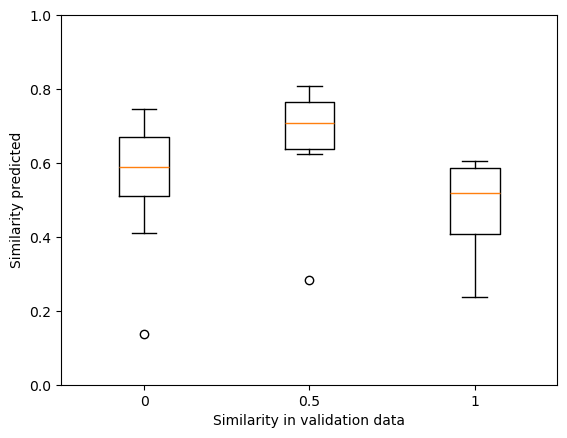

In [12]:
import matplotlib.pyplot as plt
def plot_sim_eval(sim_eval:dict):
    plt.boxplot(sim_eval.values(), labels=sim_eval.keys())
    plt.ylim(0, 1)
    plt.ylabel("Similarity predicted")
    plt.xlabel("Similarity in validation data")
    plt.show()
    
plot_sim_eval(sim_eval_desc)

## Do the same for description and tags combined

In [13]:
similarity_matrix_desc_tag = calc_sim_matrix(games_clean, 'embeddings_desc_tag')
similarity_matrix_desc_tag = similarity_matrix_desc_tag.loc[:, ~similarity_matrix_desc_tag.columns.duplicated()]
similarity_matrix_desc_tag = similarity_matrix_desc_tag.loc[~similarity_matrix_desc_tag.index.duplicated(), :]
similarity_matrix_desc

100%|██████████| 32/32 [00:00<00:00, 114.91it/s]


Name,Fallout 4,Tomb Raider,Cities: Skylines,Tomb Raider: Underworld,ELEX,Fallout 3,CastleMiner Z,Craft The World,Tomb Raider I,Cube World,...,Tomb Raider III,Crashlands,Blockland,Tomb Raider: Legend,Tomb Raider II,Tomb Raider VI: The Angel of Darkness,Batman: Arkham City,Stardew Valley,Cubic Castles,Stranded 2
Name,,,,,,,,,,,,,,,,,,,,,
Fallout 4,1.000000,0.544814,0.453530,0.585599,0.624619,0.809090,0.643474,0.567274,0.490893,0.136916,...,0.431517,0.739084,0.410726,0.586136,0.236430,0.333583,0.283818,0.590160,0.664663,0.605139
Tomb Raider,0.544814,1.000000,0.240775,0.688638,0.507671,0.475697,0.580164,0.392546,0.672906,0.083599,...,0.722289,0.589052,0.304308,0.848526,0.543902,0.653720,0.254449,0.416090,0.441647,0.507898
Cities: Skylines,0.453530,0.240775,1.000000,0.414038,0.327821,0.383130,0.346646,0.423383,0.244797,0.130535,...,0.203818,0.373579,0.493011,0.328954,0.015951,0.133483,0.258953,0.423389,0.469254,0.358757
Tomb Raider: Underworld,0.585599,0.688638,0.414038,1.000000,0.566576,0.581891,0.606346,0.492757,0.711851,0.221359,...,0.654771,0.675654,0.514229,0.822447,0.445743,0.377015,0.218695,0.442477,0.561910,0.588593
ELEX,0.624619,0.507671,0.327821,0.566576,1.000000,0.558386,0.620003,0.513403,0.473527,0.099485,...,0.469687,0.603814,0.368550,0.548813,0.298872,0.384067,0.156030,0.371638,0.493317,0.565680
Fallout 3,0.809090,0.475697,0.383130,0.581891,0.558386,1.000000,0.494712,0.423210,0.523402,0.166071,...,0.472675,0.675457,0.304318,0.552809,0.215470,0.308666,0.250302,0.472462,0.561781,0.525970
CastleMiner Z,0.643474,0.580164,0.346646,0.606346,0.620003,0.494712,1.000000,0.619831,0.406573,0.175322,...,0.439826,0.655144,0.518073,0.607947,0.287571,0.306662,0.263614,0.480875,0.572343,0.514077
Craft The World,0.567274,0.392546,0.423383,0.492757,0.513403,0.423210,0.619831,1.000000,0.354559,0.199114,...,0.349120,0.612823,0.516798,0.481899,0.229265,0.246439,0.045384,0.635754,0.622165,0.480228
Tomb Raider I,0.490893,0.672906,0.244797,0.711851,0.473527,0.523402,0.406573,0.354559,1.000000,0.218205,...,0.702512,0.559575,0.370197,0.764558,0.543172,0.512657,0.160883,0.302842,0.450415,0.517417


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_5285/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


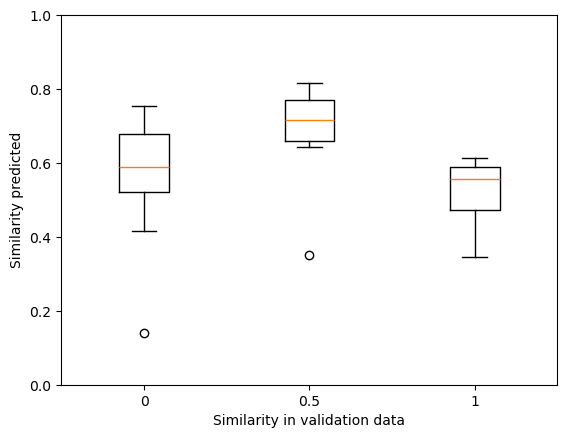

In [14]:
sim_eval_desc_tag = evaluate_similarity(val_data, similarity_matrix_desc_tag)
plot_sim_eval(sim_eval_desc_tag)

## Weighted approach with tags and description

In [15]:
similarity_matrix_tags = calc_sim_matrix(games_clean, 'tags_embd')
similarity_matrix_tags = similarity_matrix_tags.loc[:, ~similarity_matrix_tags.columns.duplicated()]
similarity_matrix_tags = similarity_matrix_tags.loc[~similarity_matrix_tags.index.duplicated(), :]
similarity_matrix_tags

100%|██████████| 32/32 [00:00<00:00, 172.49it/s]


Name,Fallout 4,Tomb Raider,Cities: Skylines,Tomb Raider: Underworld,ELEX,Fallout 3,CastleMiner Z,Craft The World,Tomb Raider I,Cube World,...,Tomb Raider III,Crashlands,Blockland,Tomb Raider: Legend,Tomb Raider II,Tomb Raider VI: The Angel of Darkness,Batman: Arkham City,Stardew Valley,Cubic Castles,Stranded 2
Name,,,,,,,,,,,,,,,,,,,,,
Fallout 4,1.000000,0.932935,0.786044,0.923000,0.885987,0.964605,0.866739,0.856037,0.883815,0.183206,...,0.883060,0.914194,0.908786,0.896557,0.889770,0.889675,0.746532,0.818120,0.860483,0.785586
Tomb Raider,0.932935,1.000000,0.756973,0.963170,0.873678,0.945736,0.813250,0.817523,0.911462,0.177065,...,0.926540,0.861417,0.869464,0.947226,0.929359,0.939119,0.672901,0.791564,0.804450,0.805166
Cities: Skylines,0.786044,0.756973,1.000000,0.753566,0.780083,0.773081,0.731475,0.861259,0.758363,0.251219,...,0.729774,0.767864,0.755512,0.743040,0.727123,0.705632,0.639108,0.803142,0.746005,0.733021
Tomb Raider: Underworld,0.923000,0.963170,0.753566,1.000000,0.876995,0.932144,0.826713,0.820642,0.917053,0.185190,...,0.936306,0.872746,0.863152,0.962056,0.922991,0.943802,0.745354,0.803671,0.814976,0.800096
ELEX,0.885987,0.873678,0.780083,0.876995,1.000000,0.873402,0.806760,0.818141,0.847335,0.209514,...,0.837948,0.840345,0.824279,0.853550,0.840790,0.855295,0.730363,0.771567,0.796228,0.785605
Fallout 3,0.964605,0.945736,0.773081,0.932144,0.873402,1.000000,0.863425,0.858634,0.871431,0.178708,...,0.887580,0.917977,0.916011,0.903094,0.890834,0.897228,0.736521,0.811661,0.853012,0.784551
CastleMiner Z,0.866739,0.813250,0.731475,0.826713,0.806760,0.863425,1.000000,0.867182,0.764676,0.206978,...,0.750971,0.919115,0.904841,0.778981,0.776840,0.775773,0.675412,0.832922,0.926757,0.740786
Craft The World,0.856037,0.817523,0.861259,0.820642,0.818141,0.858634,0.867182,1.000000,0.771351,0.226099,...,0.763608,0.876917,0.867996,0.779952,0.769111,0.753681,0.679882,0.871607,0.883467,0.739604
Tomb Raider I,0.883815,0.911462,0.758363,0.917053,0.847335,0.871431,0.764676,0.771351,1.000000,0.193973,...,0.958644,0.797688,0.818601,0.946239,0.953951,0.930492,0.683938,0.764660,0.754113,0.803871


In [20]:
similarity_matrix_desc_tag_weighted = similarity_matrix_desc_tag * 0.5 + similarity_matrix_tags * 0.5
similarity_matrix_desc_tag_weighted

Name,Fallout 4,Tomb Raider,Cities: Skylines,Tomb Raider: Underworld,ELEX,Fallout 3,CastleMiner Z,Craft The World,Tomb Raider I,Cube World,...,Tomb Raider III,Crashlands,Blockland,Tomb Raider: Legend,Tomb Raider II,Tomb Raider VI: The Angel of Darkness,Batman: Arkham City,Stardew Valley,Cubic Castles,Stranded 2
Name,,,,,,,,,,,,,,,,,,,,,
Fallout 4,1.000000,0.748938,0.621924,0.753859,0.765008,0.890619,0.760275,0.715813,0.715293,0.161979,...,0.692819,0.827860,0.662917,0.747339,0.617181,0.634174,0.548999,0.702273,0.768429,0.699331
Tomb Raider,0.748938,1.000000,0.505913,0.836605,0.706497,0.718329,0.706992,0.615648,0.807334,0.132090,...,0.856568,0.732929,0.608060,0.902634,0.767130,0.824248,0.501036,0.608462,0.638230,0.674488
Cities: Skylines,0.621924,0.505913,1.000000,0.581970,0.561654,0.577971,0.540844,0.648519,0.537399,0.185257,...,0.493763,0.570130,0.615210,0.541337,0.429770,0.446621,0.483791,0.612676,0.603371,0.546606
Tomb Raider: Underworld,0.753859,0.836605,0.581970,1.000000,0.731604,0.753303,0.718207,0.657729,0.848935,0.198349,...,0.833227,0.769800,0.695473,0.903246,0.745476,0.712336,0.536684,0.618853,0.689564,0.702437
ELEX,0.765008,0.706497,0.561654,0.731604,1.000000,0.723365,0.718965,0.674431,0.721372,0.156971,...,0.705061,0.729073,0.612591,0.718296,0.658732,0.656474,0.489368,0.575343,0.659730,0.691636
Fallout 3,0.890619,0.718329,0.577971,0.753303,0.723365,1.000000,0.683902,0.645473,0.715378,0.171479,...,0.692141,0.798211,0.609887,0.732959,0.592396,0.617893,0.526130,0.642738,0.710846,0.663842
CastleMiner Z,0.760275,0.706992,0.540844,0.718207,0.718965,0.683902,1.000000,0.748715,0.632602,0.181569,...,0.636226,0.790014,0.717039,0.704350,0.592394,0.569737,0.498259,0.656503,0.755585,0.631578
Craft The World,0.715813,0.615648,0.648519,0.657729,0.674431,0.645473,0.748715,1.000000,0.597692,0.207703,...,0.580619,0.746553,0.700070,0.637325,0.559436,0.519618,0.394378,0.753698,0.758811,0.612976
Tomb Raider I,0.715293,0.807334,0.537399,0.848935,0.721372,0.715378,0.632602,0.597692,1.000000,0.201153,...,0.879999,0.702674,0.646057,0.867306,0.786740,0.768680,0.476852,0.553279,0.635315,0.729217


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_5285/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


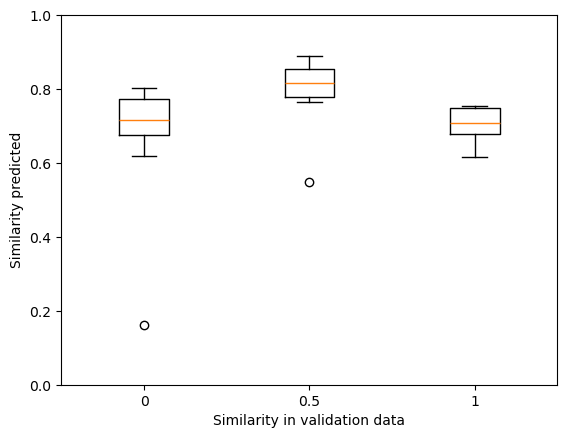

In [21]:
sim_eval_desc_tag_weighted = evaluate_similarity(val_data, similarity_matrix_desc_tag_weighted)
plot_sim_eval(sim_eval_desc_tag_weighted)

## Weighted approach with genres and description

In [28]:
similarity_matrix_genres = calc_sim_matrix(games_clean, 'genre_embd')
similarity_matrix_genres = similarity_matrix_genres.loc[:, ~similarity_matrix_genres.columns.duplicated()]
similarity_matrix_genres = similarity_matrix_genres.loc[~similarity_matrix_genres.index.duplicated(), :]
similarity_matrix_genres

100%|██████████| 32/32 [00:00<00:00, 182.06it/s]


Name,Fallout 4,Tomb Raider,Cities: Skylines,Tomb Raider: Underworld,ELEX,Fallout 3,CastleMiner Z,Craft The World,Tomb Raider I,Cube World,...,Tomb Raider III,Crashlands,Blockland,Tomb Raider: Legend,Tomb Raider II,Tomb Raider VI: The Angel of Darkness,Batman: Arkham City,Stardew Valley,Cubic Castles,Stranded 2
Name,,,,,,,,,,,,,,,,,,,,,
Fallout 4,1.000000,0.248131,0.264444,0.248131,0.721964,1.000000,0.317298,0.697880,0.248131,0.252323,...,0.248131,0.697221,0.332847,0.248131,0.248131,0.150064,0.248131,0.748591,0.443675,0.375710
Tomb Raider,0.248131,1.000000,0.404979,1.000000,0.849433,0.248131,0.774990,0.433620,1.000000,0.207683,...,1.000000,0.768595,0.622873,1.000000,1.000000,0.768199,1.000000,0.382909,0.650708,0.588014
Cities: Skylines,0.264444,0.404979,1.000000,0.404979,0.433315,0.264444,0.392534,0.781873,0.404979,0.181399,...,0.404979,0.410223,0.669845,0.404979,0.404979,0.341855,0.404979,0.604468,0.422395,0.304329
Tomb Raider: Underworld,0.248131,1.000000,0.404979,1.000000,0.849433,0.248131,0.774990,0.433620,1.000000,0.207683,...,1.000000,0.768595,0.622873,1.000000,1.000000,0.768199,1.000000,0.382909,0.650708,0.588014
ELEX,0.721964,0.849433,0.433315,0.849433,1.000000,0.721964,0.726393,0.689878,0.849433,0.285790,...,0.849433,0.928782,0.626211,0.849433,0.849433,0.630445,0.849433,0.681281,0.706464,0.624661
Fallout 3,1.000000,0.248131,0.264444,0.248131,0.721964,1.000000,0.317298,0.697880,0.248131,0.252323,...,0.248131,0.697221,0.332847,0.248131,0.248131,0.150064,0.248131,0.748591,0.443675,0.375710
CastleMiner Z,0.317298,0.774990,0.392534,0.774990,0.726393,0.317298,1.000000,0.608027,0.774990,0.374205,...,0.774990,0.827051,0.766817,0.774990,0.774990,0.622412,0.774990,0.606844,0.779813,0.764690
Craft The World,0.697880,0.433620,0.781873,0.433620,0.689878,0.697880,0.608027,1.000000,0.433620,0.345465,...,0.433620,0.789763,0.799344,0.433620,0.433620,0.341990,0.433620,0.941533,0.669534,0.617500
Tomb Raider I,0.248131,1.000000,0.404979,1.000000,0.849433,0.248131,0.774990,0.433620,1.000000,0.207683,...,1.000000,0.768595,0.622873,1.000000,1.000000,0.768199,1.000000,0.382909,0.650708,0.588014


In [29]:
similarity_matrix_desc_genres_weighted = similarity_matrix_desc * 0.5 + similarity_matrix_genres * 0.5
similarity_matrix_desc_genres_weighted

Name,Fallout 4,Tomb Raider,Cities: Skylines,Tomb Raider: Underworld,ELEX,Fallout 3,CastleMiner Z,Craft The World,Tomb Raider I,Cube World,...,Tomb Raider III,Crashlands,Blockland,Tomb Raider: Legend,Tomb Raider II,Tomb Raider VI: The Angel of Darkness,Batman: Arkham City,Stardew Valley,Cubic Castles,Stranded 2
Name,,,,,,,,,,,,,,,,,,,,,
Fallout 4,1.000000,0.396473,0.358987,0.416865,0.673291,0.904545,0.480386,0.632577,0.369512,0.194620,...,0.339824,0.718153,0.371786,0.417133,0.242280,0.241823,0.265974,0.669376,0.554169,0.490425
Tomb Raider,0.396473,1.000000,0.322877,0.844319,0.678552,0.361914,0.677577,0.413083,0.836453,0.145641,...,0.861144,0.678823,0.463591,0.924263,0.771951,0.710959,0.627225,0.399499,0.546178,0.547956
Cities: Skylines,0.358987,0.322877,1.000000,0.409509,0.380568,0.323787,0.369590,0.602628,0.324888,0.155967,...,0.304399,0.391901,0.581428,0.366967,0.210465,0.237669,0.331966,0.513928,0.445825,0.331543
Tomb Raider: Underworld,0.416865,0.844319,0.409509,1.000000,0.708005,0.415011,0.690668,0.463188,0.855926,0.214521,...,0.827385,0.722124,0.568551,0.911223,0.722872,0.572607,0.609348,0.412693,0.606309,0.588303
ELEX,0.673291,0.678552,0.380568,0.708005,1.000000,0.640175,0.673198,0.601641,0.661480,0.192638,...,0.659560,0.766298,0.497380,0.699123,0.574153,0.507256,0.502732,0.526460,0.599891,0.595170
Fallout 3,0.904545,0.361914,0.323787,0.415011,0.640175,1.000000,0.406005,0.560545,0.385766,0.209197,...,0.360403,0.686339,0.318583,0.400470,0.231801,0.229365,0.249216,0.610527,0.502728,0.450840
CastleMiner Z,0.480386,0.677577,0.369590,0.690668,0.673198,0.406005,1.000000,0.613929,0.590781,0.274764,...,0.607408,0.741097,0.642445,0.691469,0.531281,0.464537,0.519302,0.543859,0.676078,0.639383
Craft The World,0.632577,0.413083,0.602628,0.463188,0.601641,0.560545,0.613929,1.000000,0.394089,0.272289,...,0.391370,0.701293,0.658071,0.457759,0.331443,0.294214,0.239502,0.788644,0.645850,0.548864
Tomb Raider I,0.369512,0.836453,0.324888,0.855926,0.661480,0.385766,0.590781,0.394089,1.000000,0.212944,...,0.851256,0.664085,0.496535,0.882279,0.771586,0.640428,0.580441,0.342875,0.550562,0.552715


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_5285/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


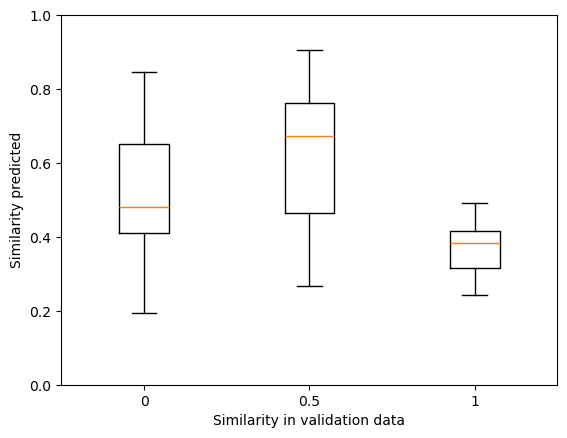

In [30]:
sim_eval_desc_genres_weighted = evaluate_similarity(val_data, similarity_matrix_desc_genres_weighted)
plot_sim_eval(sim_eval_desc_genres_weighted)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_5285/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


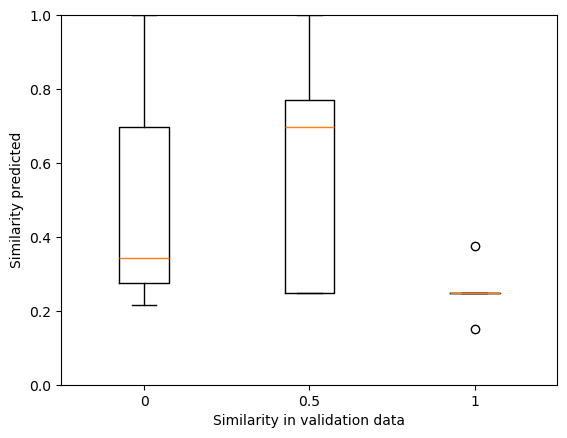

In [31]:
sim_eval_genres = evaluate_similarity(val_data, similarity_matrix_genres)
plot_sim_eval(sim_eval_genres)